In [1]:
import numpy as np 
from sklearn.datasets import make_blobs
from numpy.random import uniform, normal
from sklearn.ensemble import RandomForestClassifier as rf
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Copy of Generate Gaussian Parity from KDG.utils (Just for reference - Skip Cell)
def generate_gaussian_parity(
    n_samples,
    centers=None,
    class_label=None,
    cluster_std=0.25,
    center_box=(-1.0,1.0),
    angle_params=None,
    random_state=None,
):
    """
    Generate 2-dimensional Gaussian XOR distribution.
    (Classic XOR problem but each point is the
    center of a Gaussian blob distribution)
    Parameters
    ----------
    n_samples : int
        Total number of points divided among the four
        clusters with equal probability.
    centers : array of shape [n_centers,2], optional (default=None)
        The coordinates of the ceneter of total n_centers blobs.
    class_label : array of shape [n_centers], optional (default=None)
        class label for each blob.
    cluster_std : float, optional (default=1)
        The standard deviation of the blobs.
    center_box : tuple of float (min, max), default=(-1.0, 1.0)
        The bounding box for each cluster center when centers are generated at random.
    angle_params: float, optional (default=None)
        Number of radians to rotate the distribution by.
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    """

    if random_state != None:
        np.random.seed(random_state)

    if centers == None:
        centers = np.array([(-0.5, 0.5), (0.5, 0.5), (-0.5, -0.5), (0.5, -0.5)])

    if class_label == None:
        class_label = [0, 1, 1, 0]

    blob_num = len(class_label)

    # get the number of samples in each blob with equal probability
    samples_per_blob = np.random.multinomial(
        n_samples, 1 / blob_num * np.ones(blob_num)
    )

    X, y = make_blobs(
        n_samples=samples_per_blob,
        n_features=2,
        centers=centers,
        cluster_std=cluster_std,
        center_box=center_box
    )

    for blob in range(blob_num):
        y[np.where(y == blob)] = class_label[blob]

    if angle_params != None:
        R = _generate_2d_rotation(angle_params)
        X = X @ R

    return X, y.astype(int)

In [3]:
# Skip cell (Reference for how to use above function)
sample = 20000
X, y = generate_gaussian_parity(sample, cluster_std=0.5)

In [4]:
#TODO: Move get_colors to 'functions'
def get_colors(colors, inds):
    c = [colors[i] for i in inds]
    print(c[0])
    print(inds[0])
    return c

(0.8509803921568627, 0.37254901960784315, 0.00784313725490196)
1


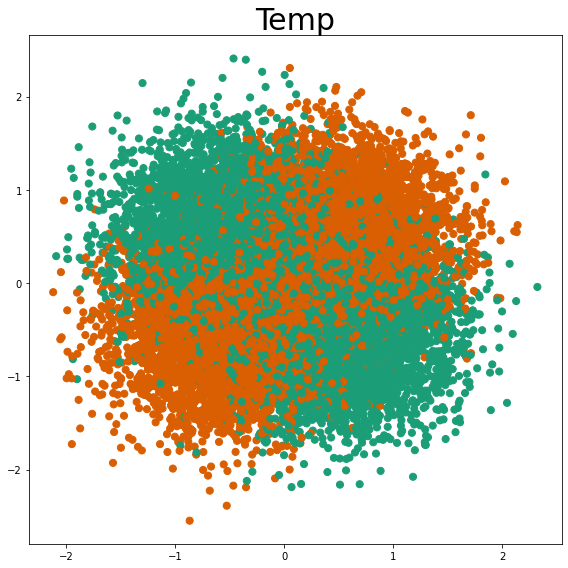

In [5]:
    #Plots all blobs on one graph with different colors
    #As visible, all gaussians are present in all quadrants 
    colors = sns.color_palette("Dark2", n_colors=2)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(X[:, 0], X[:, 1], c=get_colors(colors, y), s=50)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_title("Temp", fontsize=30)
    plt.tight_layout()

In [6]:
colors

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196)]

In [7]:
c = get_colors(colors,y)

(0.8509803921568627, 0.37254901960784315, 0.00784313725490196)
1


In [8]:
len(y)

20000

In [9]:
X.shape

(20000, 2)

In [10]:
A = np.around(X, decimals = 2)

In [11]:
A.shape

(20000, 2)

In [12]:

quad1_class1 = 0
quad2_class1 = 0
quad3_class1 = 0
quad4_class1 = 0

quad1_class0 = 0
quad2_class0 = 0
quad3_class0 = 0
quad4_class0 = 0

In [13]:
for i in range(0,sample):
    if(A[i][0]>=0 and A[i][1]>=0):
        if(y[i]==1):
            quad1_class1 = quad1_class1 + 1
        else:
            quad1_class0 = quad1_class0 + 1
    elif(A[i][0]>0 and A[i][1]<0):
        if(y[i] == 1):
            quad4_class1 = quad4_class1 + 1
        else:
            quad4_class0 = quad4_class0 + 1
    elif(A[i][0]<=0 and A[i][1]<= 0):
        if(y[i] == 1):
            quad3_class1 = quad3_class1 + 1
        else:
            quad3_class0 = quad3_class0 + 1
    elif(A[i][0]<0 and A[i][1]>0): 
        if(y[i] == 1):
            quad2_class1 = quad2_class1 + 1
        else:
            quad2_class0 = quad2_class0 + 1
    else:
        print(A[i][0], A[i][1])
    

In [14]:
quad1_class1 + quad1_class0 + quad2_class1 + quad2_class0 + quad3_class1 + quad3_class0 + quad4_class1 + quad4_class0

20000

In [15]:
error = 0

In [16]:
print("Quad 1: Actual Class = 1")
print("Probability of Class 1:  ", quad1_class1 / (quad1_class1 + quad1_class0))
print("Probability of Class 0:  ", quad1_class0 / (quad1_class1 + quad1_class0))
error1 = quad1_class0 / (quad1_class0 + quad1_class1)
error = error + error1
print("Error: ", error1)

Quad 1: Actual Class = 1
Probability of Class 1:   0.7257683215130024
Probability of Class 0:   0.27423167848699764
Error:  0.27423167848699764


In [17]:
print("Quad 2: Actual Class = 0")
print("Probability of Class 1:  ", quad2_class1 / (quad2_class1 + quad2_class0))
print("Probability of Class 0:  ", quad2_class0 / (quad2_class1 + quad2_class0))
error2 = quad2_class1 / (quad2_class0 + quad2_class1)
error = error + error2
print("Error: ", error2)

Quad 2: Actual Class = 0
Probability of Class 1:   0.2546771273385637
Probability of Class 0:   0.7453228726614364
Error:  0.2546771273385637


In [18]:
print("Quad 3: Actual Class = 1")
print("Probability of Class 1:  ", quad3_class1 / (quad3_class1 + quad3_class0))
print("Probability of Class 0:  ", quad3_class0 / (quad3_class1 + quad3_class0))
error3 = quad3_class0 / (quad3_class0 + quad3_class1)
error = error + error3
print("Error: ", error3)

Quad 3: Actual Class = 1
Probability of Class 1:   0.729585798816568
Probability of Class 0:   0.27041420118343196
Error:  0.27041420118343196


In [19]:
print("Quad 4: Actual Class = 0")
print("Probability of Class 1:  ", quad4_class1 / (quad4_class1 + quad4_class0))
print("Probability of Class 0:  ", quad4_class0 / (quad4_class1 + quad4_class0))
error4 = quad4_class1 / (quad4_class0 + quad4_class1)
error = error + error4
print("Error: ", error4)

Quad 4: Actual Class = 0
Probability of Class 1:   0.2607003891050584
Probability of Class 0:   0.7392996108949417
Error:  0.2607003891050584


In [20]:
error/4

0.26500584902851293

In [21]:
sample_size = np.logspace(
        np.log10(10),
        np.log10(100000),
        num=50,
        endpoint=True,
        dtype=int
        )

In [22]:
for sample in sample_size:
    X, y = generate_gaussian_parity(sample, cluster_std=0.5)
    A = np.around(X, decimals = 2)
    
    quad1_class1 = 0
    quad2_class1 = 0
    quad3_class1 = 0
    quad4_class1 = 0

    quad1_class0 = 0
    quad2_class0 = 0
    quad3_class0 = 0
    quad4_class0 = 0
    
    for i in range(0,sample):
        if(A[i][0]>=0 and A[i][1]>=0):
            if(y[i]==1):
                quad1_class1 = quad1_class1 + 1
            else:
                quad1_class0 = quad1_class0 + 1
        elif(A[i][0]>0 and A[i][1]<0):
            if(y[i] == 1):
                quad4_class1 = quad4_class1 + 1
            else:
                quad4_class0 = quad4_class0 + 1
        elif(A[i][0]<=0 and A[i][1]<= 0):
            if(y[i] == 1):
                quad3_class1 = quad3_class1 + 1
            else:
                quad3_class0 = quad3_class0 + 1
        elif(A[i][0]<0 and A[i][1]>0): 
            if(y[i] == 1):
                quad2_class1 = quad2_class1 + 1
            else:
                quad2_class0 = quad2_class0 + 1
        else:
            print(A[i][0], A[i][1])
    
    error1 = quad1_class0 / (quad1_class0 + quad1_class1)
    error2 = quad2_class1 / (quad2_class0 + quad2_class1)
    error3 = quad3_class0 / (quad3_class0 + quad3_class1)
    error4 = quad4_class1 / (quad4_class0 + quad4_class1)
    
    error = (error1 + error2 + error3 + error4)/4
    print("Sample Size: ", sample, "\t Error: {:.3f}".format(error))

Sample Size:  10 	 Error: 0.167
Sample Size:  12 	 Error: 0.225
Sample Size:  14 	 Error: 0.229
Sample Size:  17 	 Error: 0.271
Sample Size:  21 	 Error: 0.384
Sample Size:  25 	 Error: 0.211
Sample Size:  30 	 Error: 0.196
Sample Size:  37 	 Error: 0.213
Sample Size:  44 	 Error: 0.121
Sample Size:  54 	 Error: 0.446
Sample Size:  65 	 Error: 0.281
Sample Size:  79 	 Error: 0.242
Sample Size:  95 	 Error: 0.254
Sample Size:  115 	 Error: 0.264
Sample Size:  138 	 Error: 0.330
Sample Size:  167 	 Error: 0.285
Sample Size:  202 	 Error: 0.289
Sample Size:  244 	 Error: 0.294
Sample Size:  294 	 Error: 0.298
Sample Size:  355 	 Error: 0.260
Sample Size:  429 	 Error: 0.268
Sample Size:  517 	 Error: 0.241
Sample Size:  625 	 Error: 0.259
Sample Size:  754 	 Error: 0.255
Sample Size:  910 	 Error: 0.273
Sample Size:  1098 	 Error: 0.245
Sample Size:  1325 	 Error: 0.273
Sample Size:  1599 	 Error: 0.267
Sample Size:  1930 	 Error: 0.270
Sample Size:  2329 	 Error: 0.271
Sample Size:  2811

In [28]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [29]:
    from kdg.utils import pdf
    true_pdf_class1 = np.array([pdf(x, cov_scale=0.5) for x in grid_samples]).reshape(-1,1)
    true_pdf = np.concatenate([true_pdf_class1, 1-true_pdf_class1], axis = 1)


In [31]:
true_pdf_class1

array([[0.03532541],
       [0.03573883],
       [0.03616192],
       ...,
       [0.03644159],
       [0.03601536],
       [0.03559886]])

In [24]:
    p = np.arange(-1,1,step=0.006)
    q = np.arange(-1,1,step=0.006)
    xx, yy = np.meshgrid(p,q)
    grid_samples = np.concatenate(
            (
                xx.reshape(-1,1),
                yy.reshape(-1,1)
            ),
            axis=1
    ) 
        

In [30]:
grid_samples.shape

(111556, 2)

In [63]:
errors = []
correct_class = 0
for i in range(grid_samples.shape[0]):
    coorx = grid_samples[i][0]
    coory = grid_samples[i][1]
    
    x = grid_samples[i]
    
    if((coorx >=0 and coory >=0) or (coorx <=0 and coory <=0)):
        true_class = 1 
    else:
        true_class = 0
    
    cov_scale = 0.5
    
    mu01 = np.array([-0.5,0.5])
    mu02 = np.array([0.5,-0.5])
    mu11 = np.array([0.5,0.5])
    mu12 = np.array([-0.5,-0.5])
    cov = cov_scale * np.eye(2)
    inv_cov = np.linalg.inv(cov) 
    
    #Finding probability density functions of class 0 & class 1 at point 'x'
    p0 = (
        np.exp(- 0.5 * ((x - mu01)@inv_cov@(x-mu01).T))
        + np.exp(- 0.5 * ((x - mu02)@inv_cov@(x-mu02).T))
    )/(2*np.pi*np.sqrt(np.linalg.det(cov)))
    
    p1 = (
        np.exp(- 0.5 * ((x - mu11)@inv_cov@(x-mu11).T))
        + np.exp(- 0.5 * ((x - mu12)@inv_cov@(x-mu12).T))
    )/(2*np.pi*np.sqrt(np.linalg.det(cov)))
    
    if(p0 > p1):
        #print("true class: ", true_class, "predicted_class: ", 0)
        #Predicted class = 0
        if(true_class == 1):
           #now, predicted_class = 0, but true_class = 1, error! 
           #probability of error = probability of class 0 = p0/(p0+p1)
            errors.append(p0/(p0 + p1))
        else:
            correct_class = correct_class + 1
    else:
        #print("true class: ", true_class, "predicted_class: ", 1)
       #Predicted class = 1
        if(true_class == 0):
            #now, predicted_class = 1, but true_class = 0, error! 
           #probability of error = probability of class 0 = p0/(p0+p1)
            errors.append(p1/(p0 + p1))
        else:
            correct_class = correct_class + 1



In [64]:
#Find average error
error = np.sum(errors)/len(errors)

/var/folders/sv/04s29yxx6yngpm3jfb37p8l80000gn/T/ipykernel_20932/4071654732.py:2: RuntimeWarning: invalid value encountered in double_scalars
  error = np.sum(errors)/len(errors)


In [65]:
errors

[]

In [55]:
correct_class

111556

In [46]:
grid_samples.shape[0]

111556

In [62]:
import scipy
scipy.stats.norm([0.5,-0.5], 0.5).pdf([0,0.5])

array([0.48394145, 0.10798193])

In [76]:
errors = []
correct_class = 0
for i in range(grid_samples.shape[0]):
    coorx = grid_samples[i][0]
    coory = grid_samples[i][1]
    
    x = grid_samples[i]
    
    if((coorx >=0 and coory >=0) or (coorx <=0 and coory <=0)):
        true_class = 1 
    else:
        true_class = 0
    
    cov_scale = 0.5
    
    mu01 = np.array([-0.5,0.5])
    mu02 = np.array([0.5,-0.5])
    mu11 = np.array([0.5,0.5])
    mu12 = np.array([-0.5,-0.5])
    
    prob_g01 = scipy.stats.multivariate_normal(mu01, cov_scale).pdf(x)
    prob_g02 = scipy.stats.multivariate_normal(mu02, cov_scale).pdf(x)
    prob_g11 = scipy.stats.multivariate_normal(mu11, cov_scale).pdf(x)
    prob_g12 = scipy.stats.multivariate_normal(mu12, cov_scale).pdf(x)
    
    all_prob = [prob_g01, prob_g02, prob_g11, prob_g12]
    
    #print(all_prob)
    #print(true_class)
    #print(np.argmax(all_prob))
    
    if(np.argmax(all_prob) == 3 or np.argmax(all_prob) == 2):
        predicted_class = 1
    else:
        predicted_class = 0
    
    if(predicted_class != true_class):
        print("Mismatch!")
        print("Predicted: ", predicted_class, "True: ", true_class)
  


